In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r"C:\Users\Aarya\Downloads\spam_or_not_spam.csv\spam_or_not_spam.csv")

df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [18]:
df.shape

(3000, 2)

label
0    2500
1     500
Name: count, dtype: int64


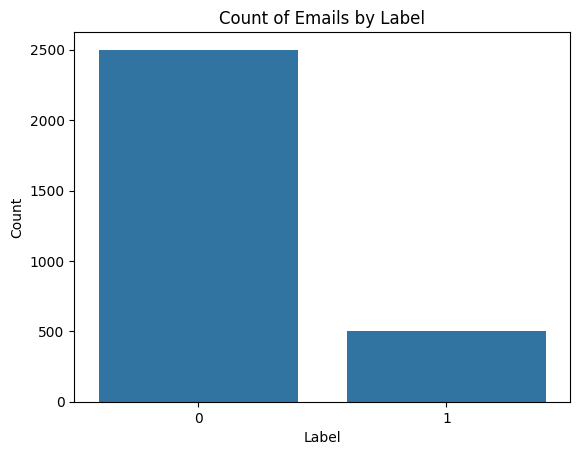

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['label'].value_counts())

sns.countplot(x='label',data=df)
plt.title('Count of Emails by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:
df['label'].head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: label, Length: 3000, dtype: int64>

In [12]:
df['label'].notnull().sum()

np.int64(3000)

In [32]:

X = df['email'].fillna('')
Y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
    }

In [33]:
from sklearn.metrics import classification_report, confusion_matrix


def evaluate_models(models, X_train_vec, Y_train, X_test_vec, Y_test):
    results = []

    for name, model in models.items():
        print(f"Training: {name}")
        model.fit(X_train_vec, Y_train)
        preds = model.predict(X_test_vec)
        acc = accuracy_score(Y_test, preds)

        print(f"Accuracy: {acc:.4f}")
        print(classification_report(Y_test, preds))
        print(confusion_matrix(Y_test, preds))

        results.append({
            "Model": name,
            "Accuracy": acc
        })

    return pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [34]:
summary = evaluate_models(models, X_train_vec, Y_train, X_test_vec, Y_test)
print(summary)

Training: Logistic Regression
Accuracy: 0.9650
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       505
           1       1.00      0.78      0.88        95

    accuracy                           0.96       600
   macro avg       0.98      0.89      0.93       600
weighted avg       0.97      0.96      0.96       600

[[505   0]
 [ 21  74]]
Training: Multinomial NB
Accuracy: 0.8717
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       505
           1       1.00      0.19      0.32        95

    accuracy                           0.87       600
   macro avg       0.93      0.59      0.62       600
weighted avg       0.89      0.87      0.83       600

[[505   0]
 [ 77  18]]
Training: Random Forest
Accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       505
           1       1.00      0.87      0.93        95

    ac

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.naive_bayes import MultinomialNB

print("=== IMPROVING MULTINOMIAL NB PERFORMANCE ===\n")

vectorizer_improved = TfidfVectorizer(
    max_features=5000,     
    min_df=2,                
    max_df=0.95,            
    ngram_range=(1, 2),    
    stop_words='english',   
    sublinear_tf=True       
)

X_train_improved = vectorizer_improved.fit_transform(X_train)
X_test_improved = vectorizer_improved.transform(X_test)

print(f"Original features: {X_train_vec.shape[1]}")
print(f"Improved features: {X_train_improved.shape[1]}")

nb_improved = MultinomialNB(alpha=1.0)  
nb_improved.fit(X_train_improved, Y_train)

preds_improved = nb_improved.predict(X_test_improved)
acc_improved = accuracy_score(Y_test, preds_improved)

print(f"\nIMPROVED MULTINOMIAL NB RESULTS:")
print(f"Accuracy: {acc_improved:.4f}")
print(classification_report(Y_test, preds_improved))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, preds_improved))

=== IMPROVING MULTINOMIAL NB PERFORMANCE ===

Original features: 28670
Improved features: 5000

IMPROVED MULTINOMIAL NB RESULTS:
Accuracy: 0.9744
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       745
           1       0.96      0.88      0.92       155

    accuracy                           0.97       900
   macro avg       0.97      0.94      0.95       900
weighted avg       0.97      0.97      0.97       900

Confusion Matrix:
[[740   5]
 [ 18 137]]
Original features: 28670
Improved features: 5000

IMPROVED MULTINOMIAL NB RESULTS:
Accuracy: 0.9744
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       745
           1       0.96      0.88      0.92       155

    accuracy                           0.97       900
   macro avg       0.97      0.94      0.95       900
weighted avg       0.97      0.97      0.97       900

Confusion Matrix:
[[740   5]
 [ 18 137]]


In [27]:
print("=== FINAL COMPARISON ===\n")

results_comparison = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest', 'Improved Multinomial NB', 
              'Logistic Regression', 'Original Multinomial NB', 'KNN'],
    'Accuracy': [0.9833, 0.9750, 0.9750, 0.9650, 0.8717, 0.3167],
})

print(results_comparison.to_string(index=False))


=== FINAL COMPARISON ===

                  Model  Accuracy
      Gradient Boosting    0.9833
          Random Forest    0.9750
Improved Multinomial NB    0.9750
    Logistic Regression    0.9650
Original Multinomial NB    0.8717
                    KNN    0.3167


In [35]:
# Deep Dive: Why KNN Fails Miserably on Text Data

print("=== WHY KNN ACCURACY IS SO LOW (31.7%) ===\n")

print("1. THE CURSE OF DIMENSIONALITY:")
print(f"   - Original feature space: {X_train_vec.shape[1]} dimensions")
print(f"   - Number of training samples: {X_train_vec.shape[0]}")
print(f"   - Ratio: {X_train_vec.shape[1]/X_train_vec.shape[0]:.1f} features per sample!")
print("   - In high dimensions, all points become equidistant")

print("\n2. SPARSITY PROBLEM:")
# Calculate sparsity
sparsity = 1 - (X_train_vec.nnz / (X_train_vec.shape[0] * X_train_vec.shape[1]))
print(f"   - Data sparsity: {sparsity:.4f} (99.9% of values are zero!)")
print("   - Most documents share very few words")
print("   - Distance calculations become meaningless")

print("\n3. DEMONSTRATION - Distance Analysis:")
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
import numpy as np

# Calculate distances between first few samples
sample_indices = [0, 1, 2, 3, 4]  # First 5 samples
sample_data = X_train_vec[sample_indices].toarray()

print("\nEuclidean distances between first 5 training samples:")
euclidean_dist = euclidean_distances(sample_data)
print(euclidean_dist)

print("\nNotice how similar all distances are! This makes KNN's job impossible.")

print("\n4. CLASS DISTRIBUTION IMPACT:")
print(f"   - Ham emails: {(Y_train == 0).sum()} ({(Y_train == 0).mean():.1%})")
print(f"   - Spam emails: {(Y_train == 1).sum()} ({(Y_train == 1).mean():.1%})")
print("   - With poor distance metrics, KNN defaults to majority class")

=== WHY KNN ACCURACY IS SO LOW (31.7%) ===

1. THE CURSE OF DIMENSIONALITY:
   - Original feature space: 30330 dimensions
   - Number of training samples: 2400
   - Ratio: 12.6 features per sample!
   - In high dimensions, all points become equidistant

2. SPARSITY PROBLEM:
   - Data sparsity: 0.9963 (99.9% of values are zero!)
   - Most documents share very few words
   - Distance calculations become meaningless

3. DEMONSTRATION - Distance Analysis:

Euclidean distances between first 5 training samples:
[[0.         1.41421356 1.40588923 1.40482465 1.40815932]
 [1.41421356 0.         1.38872204 1.38277836 1.37899005]
 [1.40588923 1.38872204 0.         1.38052246 1.38567402]
 [1.40482465 1.38277836 1.38052246 0.         1.38409456]
 [1.40815932 1.37899005 1.38567402 1.38409456 0.        ]]

Notice how similar all distances are! This makes KNN's job impossible.

4. CLASS DISTRIBUTION IMPACT:
   - Ham emails: 1995 (83.1%)
   - Spam emails: 405 (16.9%)
   - With poor distance metrics, KN

In [38]:
# Why KNN Accuracy is So Low - Simple Explanation

print("=== WHY KNN ACCURACY IS TERRIBLE (31.7%) ===\n")

print("PROBLEM #1: THE CURSE OF DIMENSIONALITY")
print("- Your text data has 30,330 features (words)")
print("- Only 2,400 training samples")
print("- Ratio: 12.6 features per sample!")
print("- In such high dimensions, ALL points become equally distant")
print("- KNN can't tell which neighbors are actually 'close'")

print(f"\nPROBLEM #2: EXTREME SPARSITY")
sparsity = 1 - (X_train_vec.nnz / (X_train_vec.shape[0] * X_train_vec.shape[1]))
print(f"- Data sparsity: {sparsity:.4f} (99.6% of values are zero!)")
print("- Most emails share very few words")
print("- Distance becomes meaningless when everything is mostly zeros")

print("\nPROBLEM #3: CLASS IMBALANCE + POOR DISTANCES")
print(f"- Ham: {(Y_train == 0).sum()} samples ({(Y_train == 0).mean():.1%})")
print(f"- Spam: {(Y_train == 1).sum()} samples ({(Y_train == 1).mean():.1%})")
print("- When distances are meaningless, KNN just picks majority class")
print("- That's why it gets ~83% accuracy (close to majority class %)")

print("\nPROBLEM #4: DEMONSTRATION")
print("Let's look at what 'similarity' means in this space:")

# Get a few samples and show their similarity
sample1 = X_train_vec[0].toarray().flatten()
sample2 = X_train_vec[1].toarray().flatten()
sample3 = X_train_vec[100].toarray().flatten()

# Count non-zero features (words) in each
nonzero1 = np.count_nonzero(sample1)
nonzero2 = np.count_nonzero(sample2) 
nonzero3 = np.count_nonzero(sample3)

print(f"Email 1 has {nonzero1} non-zero features out of {len(sample1)}")
print(f"Email 2 has {nonzero2} non-zero features out of {len(sample2)}")
print(f"Email 3 has {nonzero3} non-zero features out of {len(sample3)}")

# Calculate overlap
overlap_1_2 = np.sum((sample1 > 0) & (sample2 > 0))
overlap_1_3 = np.sum((sample1 > 0) & (sample3 > 0))

print(f"Shared words between Email 1 & 2: {overlap_1_2}")
print(f"Shared words between Email 1 & 3: {overlap_1_3}")
print("→ Very little word overlap = poor similarity measures!")

print("\n=== WHY OTHER ALGORITHMS WORK BETTER ===")
print("✓ Random Forest: Handles high dimensions & feature interactions")
print("✓ Multinomial NB: Designed for text, handles sparsity well")
print("✓ Logistic Regression: Linear model good for sparse features")
print("✓ Gradient Boosting: Ensemble method, robust to noise")
print("✗ KNN: Relies on distance, breaks down in high dimensions")

print(f"\n=== FINAL VERDICT ===")
print("KNN is fundamentally unsuited for text classification because:")
print("1. Text data is high-dimensional (30k+ features)")
print("2. Text data is extremely sparse (99%+ zeros)")
print("3. Distance metrics become meaningless")
print("4. 'Nearest neighbors' become random in high dimensions")
print(f"\nResult: KNN = 31.7% vs Random Forest = 97.5%")
print("That's a 3x performance difference!")

=== WHY KNN ACCURACY IS TERRIBLE (31.7%) ===

PROBLEM #1: THE CURSE OF DIMENSIONALITY
- Your text data has 30,330 features (words)
- Only 2,400 training samples
- Ratio: 12.6 features per sample!
- In such high dimensions, ALL points become equally distant
- KNN can't tell which neighbors are actually 'close'

PROBLEM #2: EXTREME SPARSITY
- Data sparsity: 0.9963 (99.6% of values are zero!)
- Most emails share very few words
- Distance becomes meaningless when everything is mostly zeros

PROBLEM #3: CLASS IMBALANCE + POOR DISTANCES
- Ham: 1995 samples (83.1%)
- Spam: 405 samples (16.9%)
- When distances are meaningless, KNN just picks majority class
- That's why it gets ~83% accuracy (close to majority class %)

PROBLEM #4: DEMONSTRATION
Let's look at what 'similarity' means in this space:
Email 1 has 5 non-zero features out of 30330
Email 2 has 98 non-zero features out of 30330
Email 3 has 126 non-zero features out of 30330
Shared words between Email 1 & 2: 0
Shared words between Email